## DATA UNDERSTANDING
Understanding problem statement

Risk analytics in banking and financial services involves the application of statistical models, data analysis, and predictive modeling to assess and manage potential financial risks. The primary objective is to leverage data-driven insights to minimize the risk of losing money when extending loans to customers

Downloaded the data set and performed the below

A) Checked for the data set provided and examined the below
1) All columns have a name
2) No duplicate columns should be present
3) No invalid data should be present e.g in interest rate column ; years or any random string shouldnt be present
4) Any totally blank row / columns exists

B) Checked the data dictionary to understand the meanings of the variables



## DATA CLEANING AND MANIPULATION

Data cleaning and manipulation are essential steps in the data preprocessing pipeline, preparing raw data for analysis and modeling. These processes involve handling missing or inconsistent data, transforming variables, and organizing the data in a way that makes it suitable for analysis.

## DATA CLEANING: 1

In [5]:
# Importing necessary libaries and reading the csv and storing it as dataframe

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

# Reading the data set
df = pd.read_csv('loan.csv')

# check total number of rows and columns
print(df.shape)


# DATA CLEANING : 1
# ===================
## Check all columns which have null values more than 70% and drop the columns from data set
## Calculate the percentage of null values in each column
null_percentage = 100 * df.isnull().mean()

# Filter columns with more than 70% null values
columns_with_high_null_percentage = null_percentage[null_percentage > 70].index

# Drop columns with more than the threshold percentage of null values
df = df.drop(columns=columns_with_high_null_percentage)

# check total number of rows and columns after dropping the above columns
print(df.shape)

(39717, 111)
(39717, 55)


## DATA CLEANING: 2

In [6]:

# DATA CLEANING : 2
# ===================
# Data set contains a column "emp_length". The value in this column are >10+ years , <1 years , 5 years
# Hence we convert the 'emp_length' column to numeric by defining >10+ years as 10 and <1 years as 0
# Also replacing years with space 

df['emp_length'] = df['emp_length'].str.replace('10\+ years','10 years', regex=True)
df['emp_length'] = df['emp_length'].str.replace('< 1 year','0 years', regex=True)
df['emp_length'] = df['emp_length'].str.replace(' yea.*','', regex=True)

## DATA MANIPULATION: 1

In [7]:
# count the number of missing values in each column
df.isnull().sum()

# Data Manipulation: 1
# Converting emp_length column to numeric
# coerce is used to handle errors during the conversion process by replacing problematic values with NaN 
# There are multiple null values in emp_length are null; we can fill those with mean of other values 
#e.g 4.9 and rounded off to 5 in this case

# Convert the 'emp_length' column to numeric, handling errors
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce')

# # Calculate the mean of the non-missing values to nearest rounded integer
mean_value = round(df['emp_length'].mean())

# # Fill missing values with the mean
df['emp_length'].fillna(mean_value, inplace=True)

## DATA MANIPULATION: 2

In [8]:
# Data Manipulation: 2
# Converting interest rate column to numeric type

# Replace "%" with an empty string in the 'interest_rate' column
df['int_rate'] = df['int_rate'].str.replace('%', '')

# Convert the column to numeric type
df['int_rate'] = pd.to_numeric(df['int_rate'])

## DATA CLEANING: 3

In [9]:
# DATA CLEANING : 3
# ===================
## Categorize all remaining 55 columns based on its values and meaning between categorical variables, numerical variables or extra columns
## Drop extra columns from entire data set
categorical_cols=["home_ownership", "verification_status","loan_status","purpose","delinq_2yrs"] 
numerical_cols=["loan_amnt","term","int_rate", "installment","emp_length","annual_inc","dti","open_acc","pub_rec","total_acc","acc_now_delinq",] 
extra_cols=["id", "member_id", "emp_title","funded_amnt","funded_amnt_inv","grade","sub_grade","issue_d","pymnt_plan","url","desc","title","zip_code","addr_state","earliest_cr_line","application_type", "inq_last_6mths","mths_since_last_delinq","revol_bal","revol_util","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int", "total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","collections_12_mths_ex_med","policy_code","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens"]

df = df.drop(extra_cols , axis=1)

# check total number of rows and columns after dropping the above columns
print(df.shape)


(39717, 16)


## UNIVARIATE ANALYIS :1

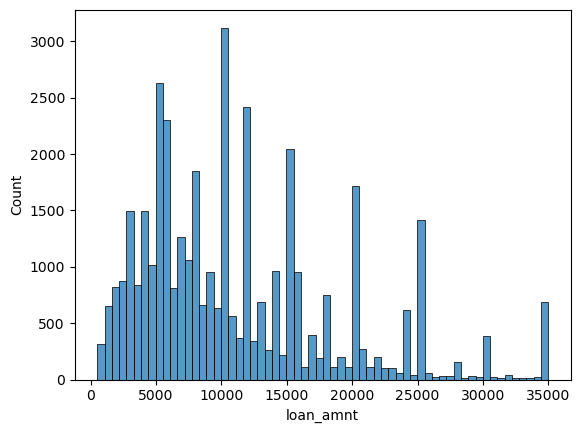

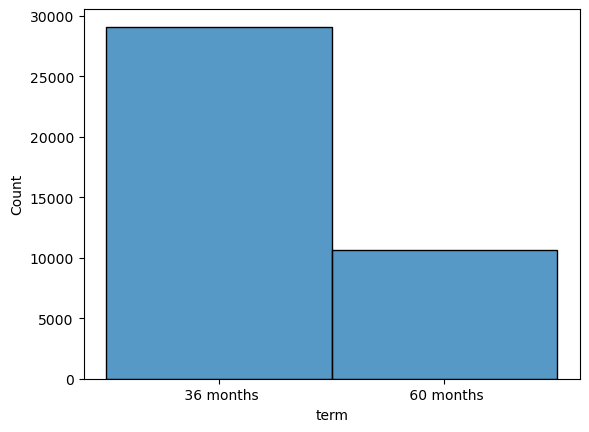

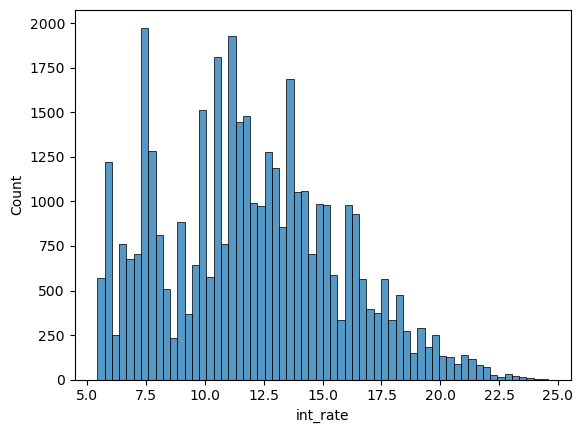

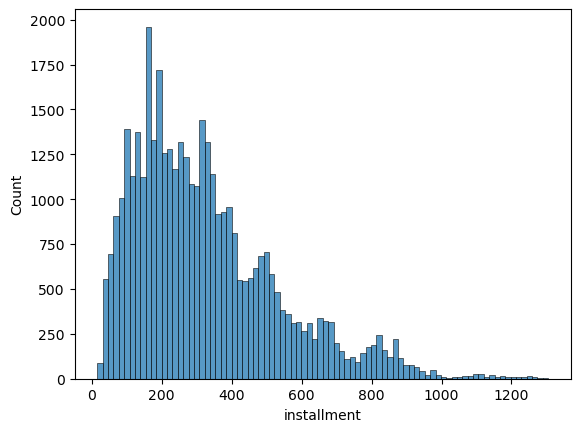

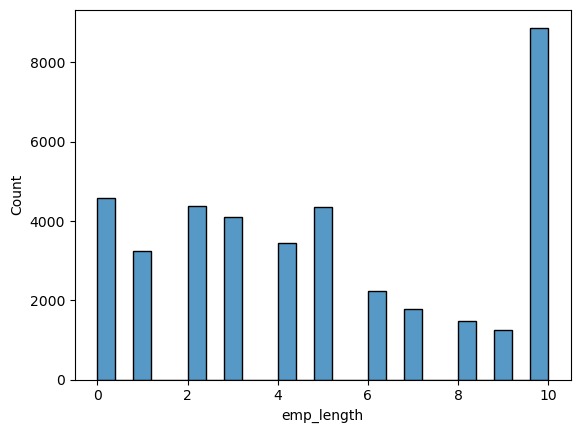

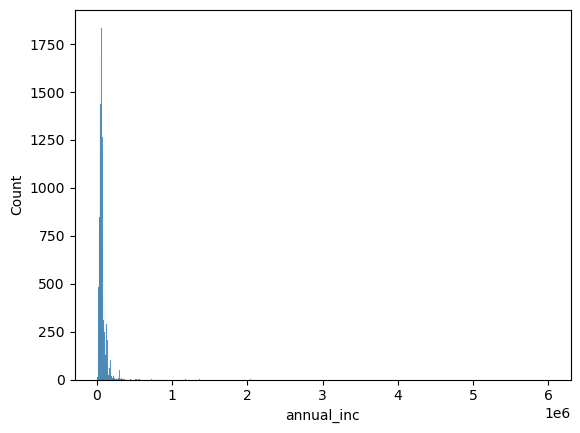

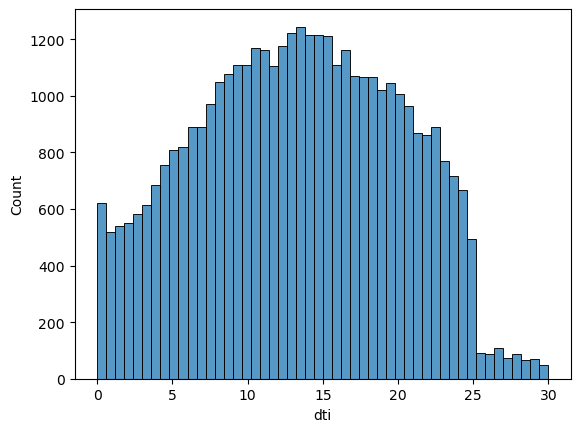

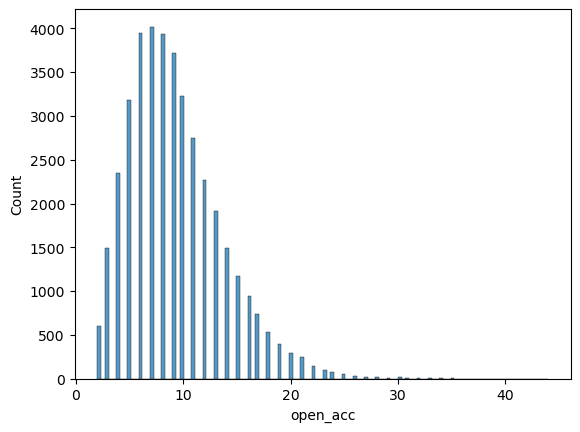

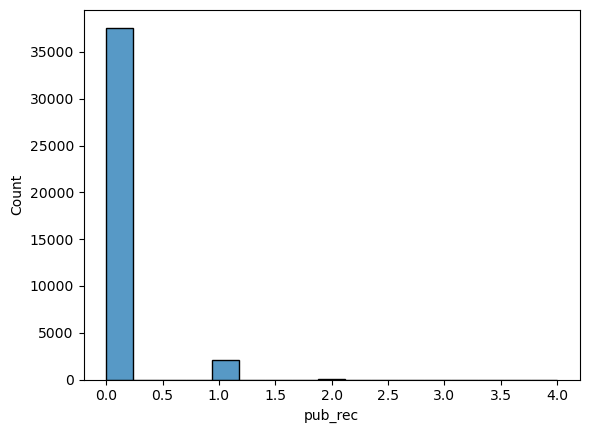

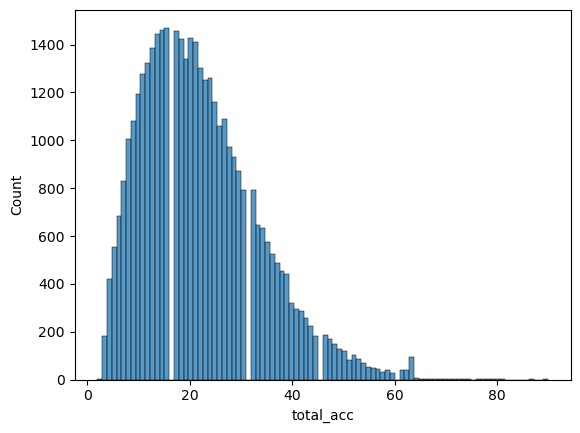

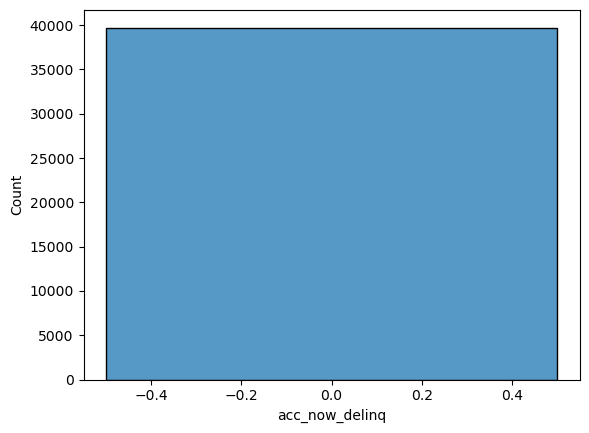

In [10]:
#Univariate Analysis : 1 between numerical columns
# Analysis from below univariate analysis of numerical columns
# More number of people take loan on small terms
# Max number of people are granted loan with int rate between 7.5% to 14%

for col in numerical_cols:
    sns.histplot(x=df[col])
    plt.show()

## UNIVARIATE ANALYSIS :2

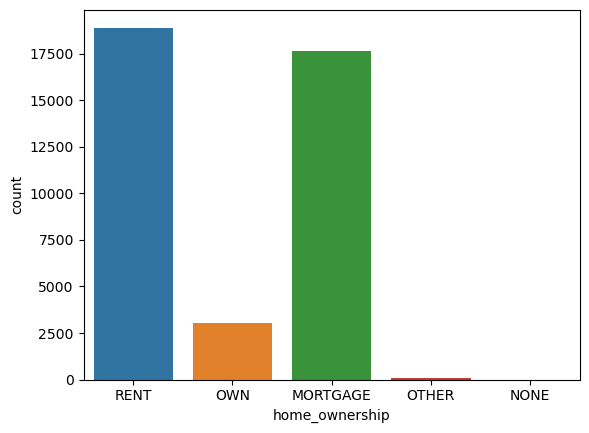

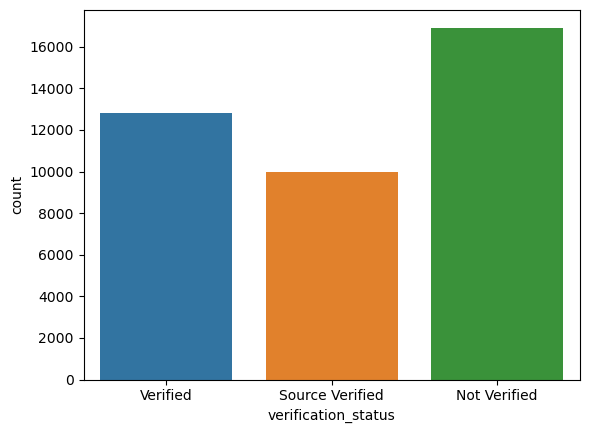

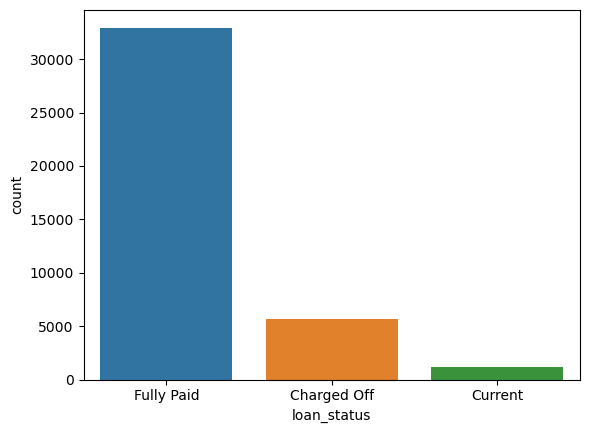

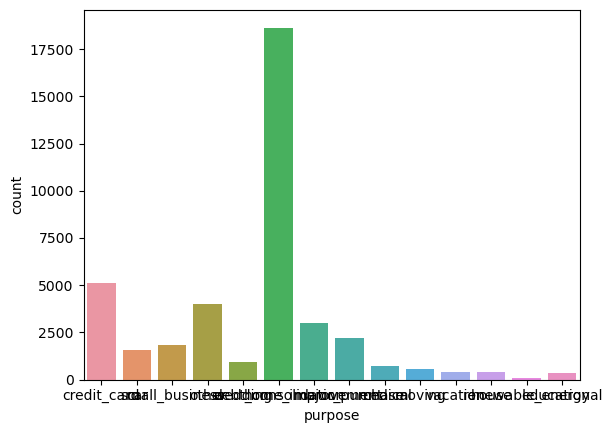

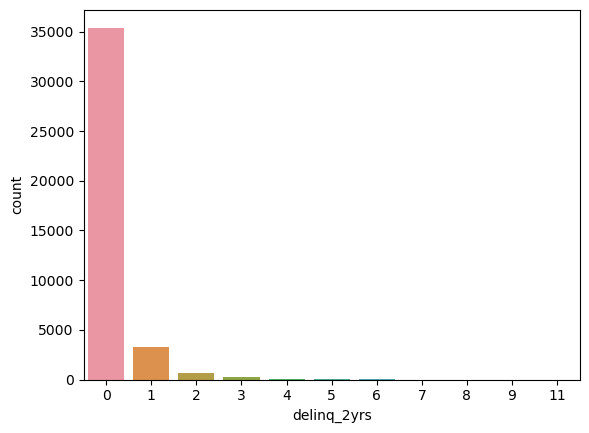

In [11]:
#Univariate Analysis : 2 between categorical columns
# Analysis from below univariate analysis of categorical columns
# Defaulters are very less as borrowers income or source is verified
# Max number of people provide home ownership as rent or mortgage . The factors might be as below
# Mobility , flexibility , affordability

for col in categorical_cols:
    sns.countplot(x=df[col])
    plt.show()

## CORRELATION ANALYSIS

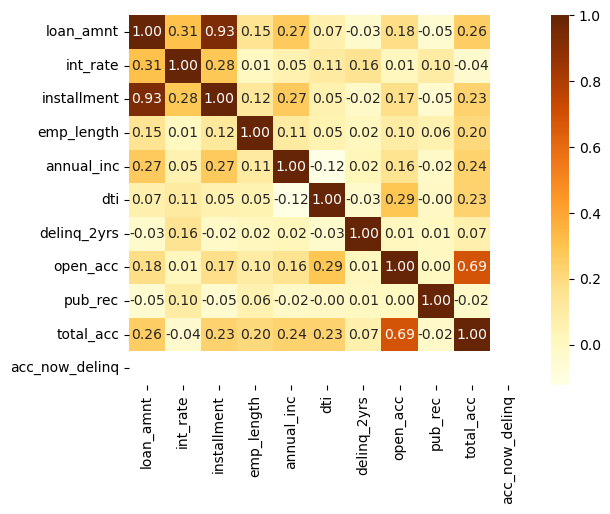

In [14]:
##Correlation Analysis
# open account has positive coorelation with all variables but its closely related to total acc ,
# hence we can skip any one column for consideration of analysis
# loan amount and installment are very closely related , 
#hence we can skip any one column for consideration of analysis

sns.heatmap(df.corr(), annot=True, cmap='YlOrBr', fmt='.2f')
plt.show()

## BIVARIATE ANALYSIS: 1 (LOAN STATUS vs LOAN TERM)

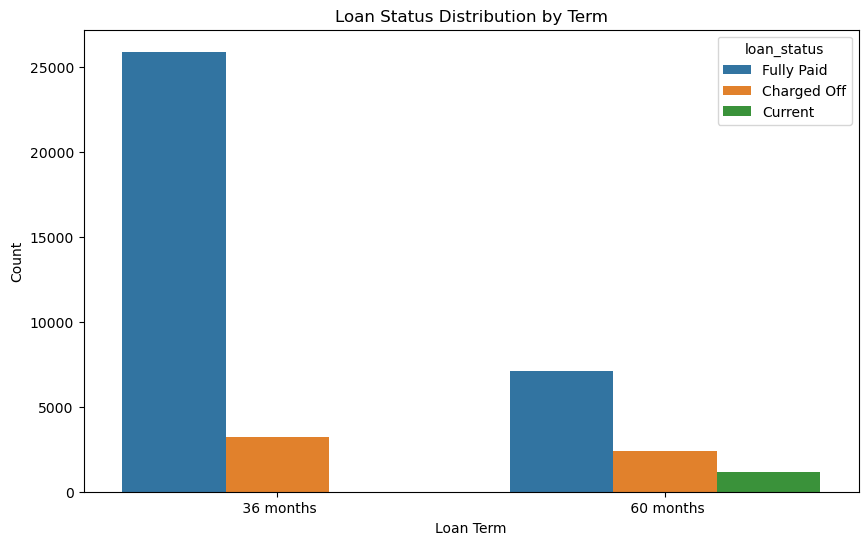

loan_status  Charged Off    Current  Fully Paid
term                                           
 36 months     11.090872   0.000000   88.909128
 60 months     22.596742  10.733453   66.669805


In [15]:
# LOAN STATUS vs LOAN TERM
# Analysis : Longer-term loans may have a higher risk of being charged off.

plt.figure(figsize=(10, 6))

sns.countplot(x='term', hue='loan_status', data=df)
plt.title('Loan Status Distribution by Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.show()

# To verify above analysis ; lets check with how much % of charge off varies with loan term

# Count the number of loans for each loan term and loan status
term_loan_status_counts = df.groupby(['term', 'loan_status']).size().unstack(fill_value=0)

# Calculate the percentage of charge-offs and fully paid for each term
term_loan_status_percentages = term_loan_status_counts.div(term_loan_status_counts.sum(axis=1), axis=0) * 100

# Display the result
print(term_loan_status_percentages)


## BIVARIATE ANALYSIS: 2 (LOAN STATUS vs PURPOSE)

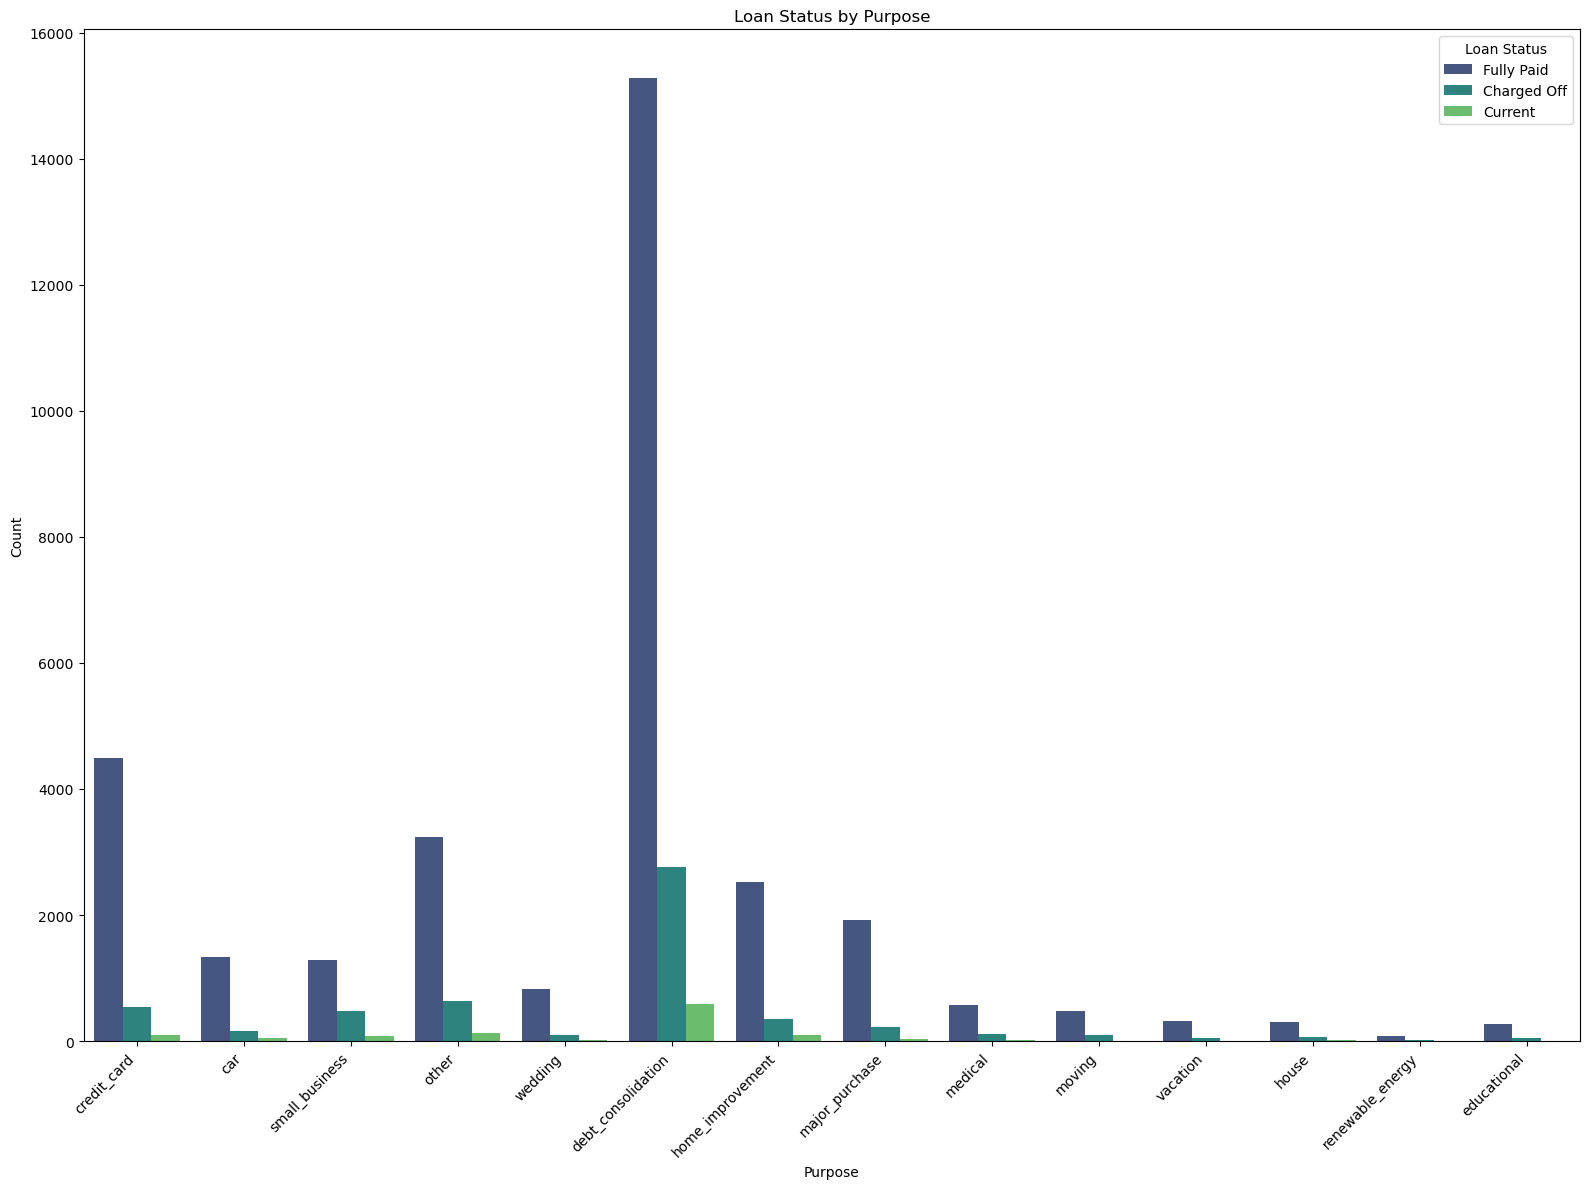

loan_status         Charged Off   Current  Fully Paid
purpose                                              
car                   10.329245  3.227889   86.442866
credit_card           10.565302  2.007797   87.426901
debt_consolidation    14.843624  3.143608   82.012768
educational           17.230769  0.000000   82.769231
home_improvement      11.659946  3.393817   84.946237
house                 15.485564  3.674541   80.839895
major_purchase        10.150892  1.691815   88.157293
medical               15.295815  1.731602   82.972583
moving                15.780446  1.200686   83.018868
other                 15.852742  3.205610   80.941648
renewable_energy      18.446602  0.970874   80.582524
small_business        25.984683  4.048140   69.967177
vacation              13.910761  1.574803   84.514436
wedding               10.137276  2.217529   87.645195


In [17]:
# LOAN STATUS vs PURPOSE
# Analysis : Max people apply with "debt consolidation" as purpose
# Chances of charge off with debt consolidation as purpose of loan is higher 
plt.figure(figsize=(16, 12))
sns.countplot(x='purpose', hue='loan_status', data=df, palette='viridis')
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Loan Status', loc='upper right')
plt.tight_layout()

plt.show()

# Lets also check with %age method ; how % of charge off gets affected with purpose 
# Analysis purpose renewable_energy , small_business have higher %age of charge off with the total count of loans provided 

# Count the number of loans for each purpose and loan status
purpose_loan_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Calculate the percentage of charge-offs and fully paid for each purpose
purpose_loan_status_percentages = purpose_loan_status_counts.div(purpose_loan_status_counts.sum(axis=1), axis=0) * 100

# Display the result
print(purpose_loan_status_percentages)

## BIVARIATE ANALYSIS: 3 (INTEREST RATE vs PURPOSE)

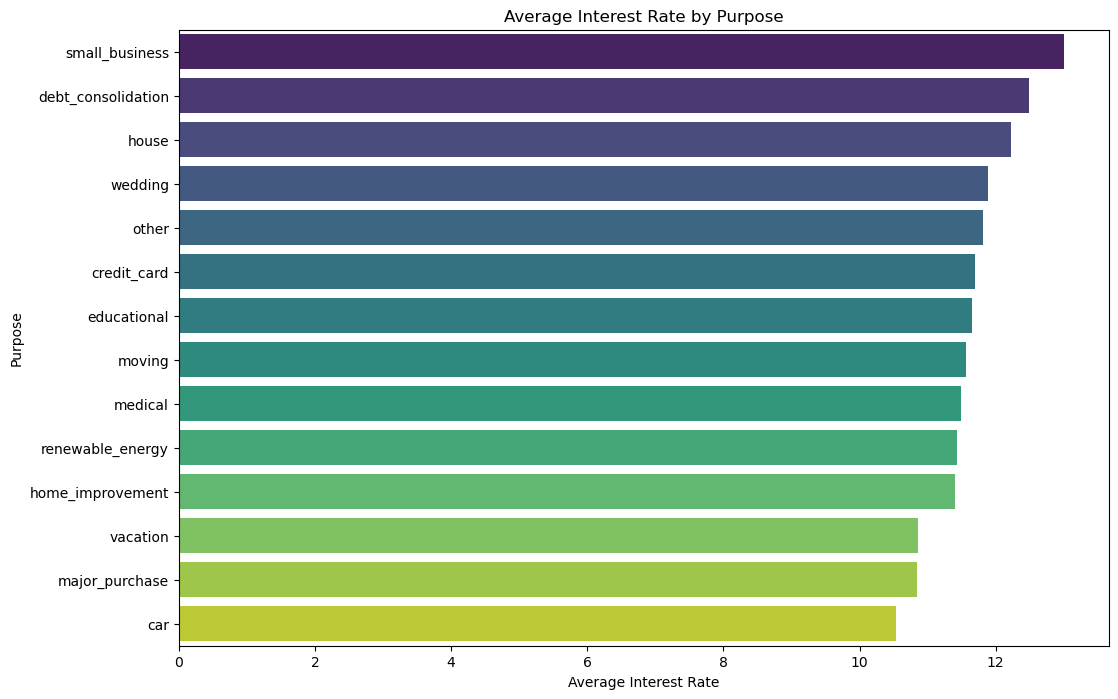

Average Interest Rate by Purpose:
purpose
small_business        13.009048
debt_consolidation    12.487890
house                 12.228136
wedding               11.885544
other                 11.815111
credit_card           11.701173
educational           11.650831
moving                11.563619
medical               11.492121
renewable_energy      11.437573
home_improvement      11.400265
vacation              10.856089
major_purchase        10.843064
car                   10.530097
Name: int_rate, dtype: float64


In [18]:
# INTEREST RATE vs PURPOSE
# Analysis : Interest rate increases when purpose is small business or debt consolidation 

# Now, the 'interest_rate' column contains numeric values without the percentage sign# Calculate the average interest rate for each purpose
average_interest_rate_by_purpose = df.groupby('purpose')['int_rate'].mean().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=average_interest_rate_by_purpose.values, y=average_interest_rate_by_purpose.index, palette='viridis')
plt.title('Average Interest Rate by Purpose')
plt.xlabel('Average Interest Rate')
plt.ylabel('Purpose')
plt.show()

# Print the average interest rates
print("Average Interest Rate by Purpose:")
print(average_interest_rate_by_purpose)

## BIVARIATE ANALYSIS: 4 (LOAN STATUS vs DTI)

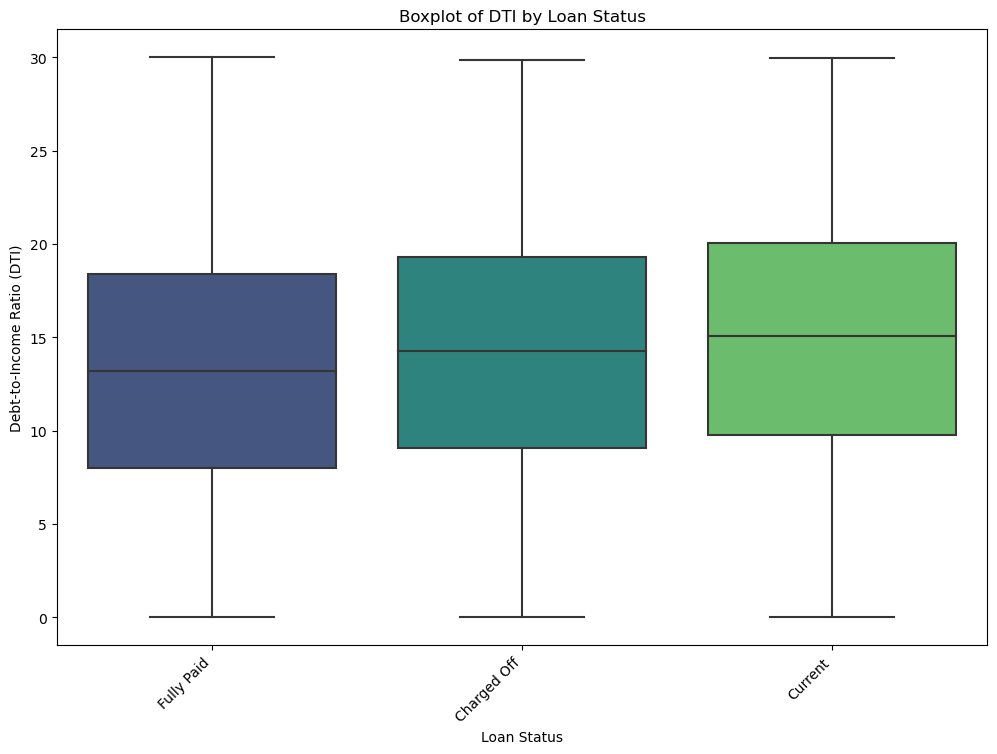

In [19]:
# LOAN STATUS vs DTI
# Analysis : Increase in DTI increase chances of charge off
plt.figure(figsize=(12, 8))
sns.boxplot(x='loan_status', y='dti', data=df, palette='viridis')
plt.title('Boxplot of DTI by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio (DTI)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

## MULTIVARIATE ANALYSIS: 1 (LOAN STATUS vs Installment vs Int rate)

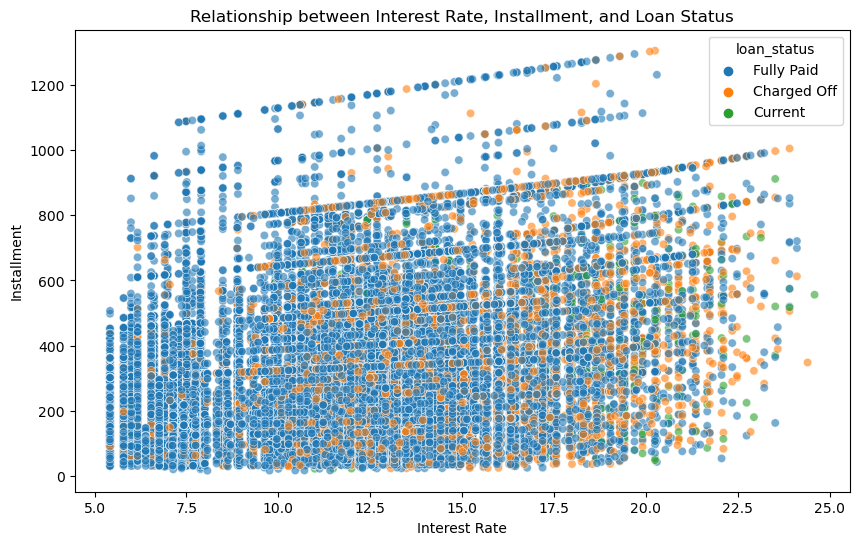

In [20]:
# Scatter plot for int_rate vs. installment with color-coded loan status 
# Analysis : when interest rate increases ; we observe charge off increases irrespective of installment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='int_rate', y='installment', hue='loan_status', data=df, alpha=0.6)
plt.title('Relationship between Interest Rate, Installment, and Loan Status')
plt.xlabel('Interest Rate')
plt.ylabel('Installment')
plt.show()

## BIVARIATE ANALYSIS: 5 (LOAN TERM vs INTEREST RATE)

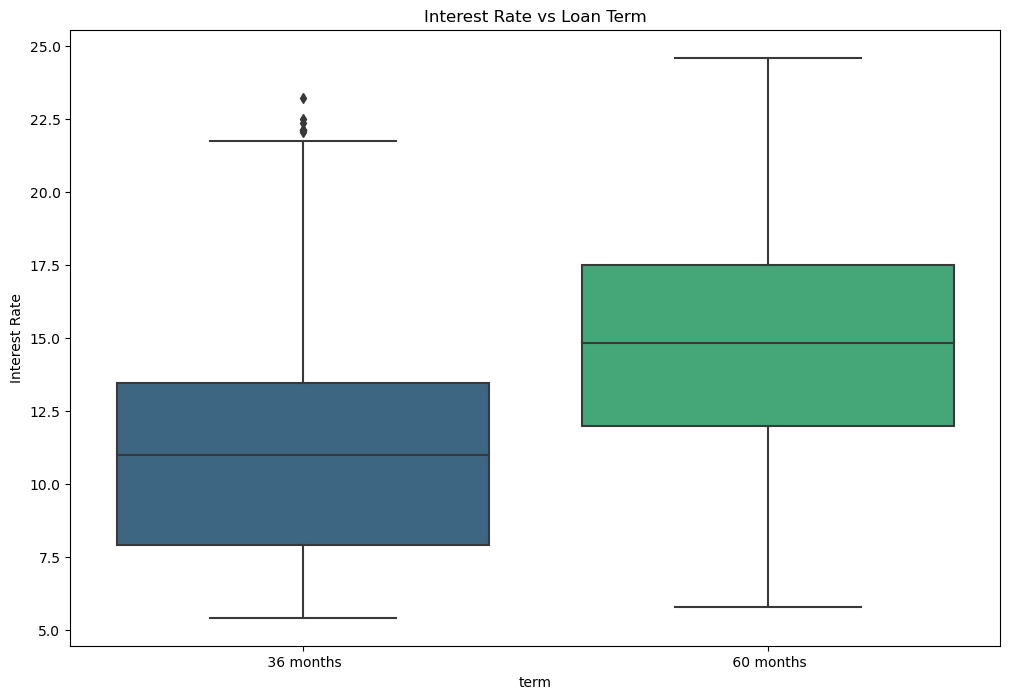

In [21]:
# LOAN TERM VS INTEREST RATE
# Analysis : Increase in loan term increases the interest rate 

plt.figure(figsize=(12, 8))
sns.boxplot(x='term', y='int_rate', data=df, palette='viridis')

# Add labels and title
plt.xlabel('term')
plt.ylabel('Interest Rate')
plt.title('Interest Rate vs Loan Term')

# Show the plot
plt.show()

## BIVARIATE ANALYSIS: 6 (Number of Delinquencies in the Last 2 Years vs LOAN STATUS)

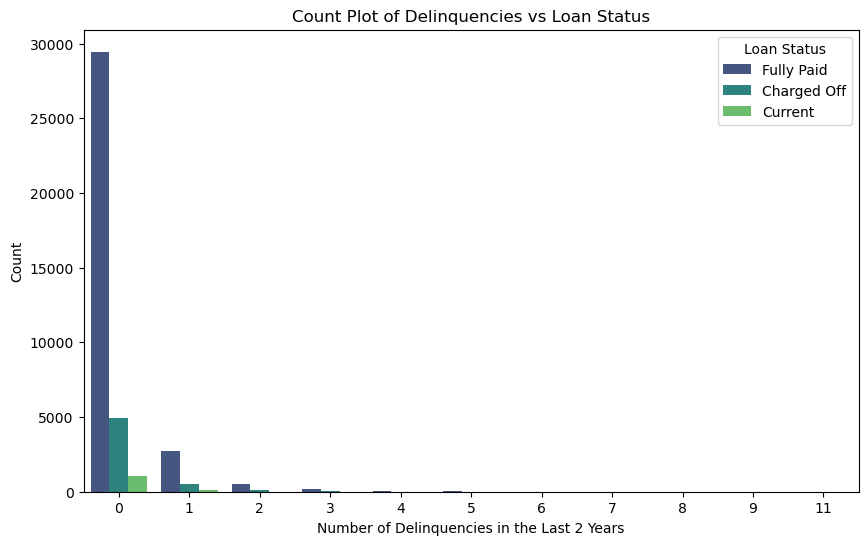

loan_status  Charged Off   Current  Fully Paid
delinq_2yrs                                   
0              13.941534  2.878125   83.180342
1              15.349682  2.906449   81.743869
2              18.922853  2.037846   79.039301
3              15.909091  3.636364   80.454545
4              20.967742  3.225806   75.806452
5              13.636364  4.545455   81.818182
6              10.000000  0.000000   90.000000
7              25.000000  0.000000   75.000000
8              50.000000  0.000000   50.000000
9               0.000000  0.000000  100.000000
11              0.000000  0.000000  100.000000


In [22]:
#Number of Delinquencies in the Last 2 Years vs LOAN STATUS
# Analysis are as below
# Borrowers with a higher number of delinquencies are more likely to have loans that end up being "Charged Off."
# Borrowers with no delinquencies (delinq_2yrs = 0) have a high percentage of loans that are "Fully Paid."
# For categories like 6, 7, 8, 9, and 11 delinquencies, the percentages are based on a small number of instances, making the interpretation less reliable.

plt.figure(figsize=(10, 6))
sns.countplot(x='delinq_2yrs', hue='loan_status', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Number of Delinquencies in the Last 2 Years')
plt.ylabel('Count')
plt.title('Count Plot of Delinquencies vs Loan Status')

# Show the legend
plt.legend(title='Loan Status')

# Show the plot
plt.show()

# Count the number of loans 
loan_status_counts = df.groupby(['delinq_2yrs', 'loan_status']).size().unstack(fill_value=0)

# Calculate the percentage of charge-offs and fully paid for each term
loan_status_percentages = loan_status_counts.div(loan_status_counts.sum(axis=1), axis=0) * 100

# Display the result
print(loan_status_percentages)


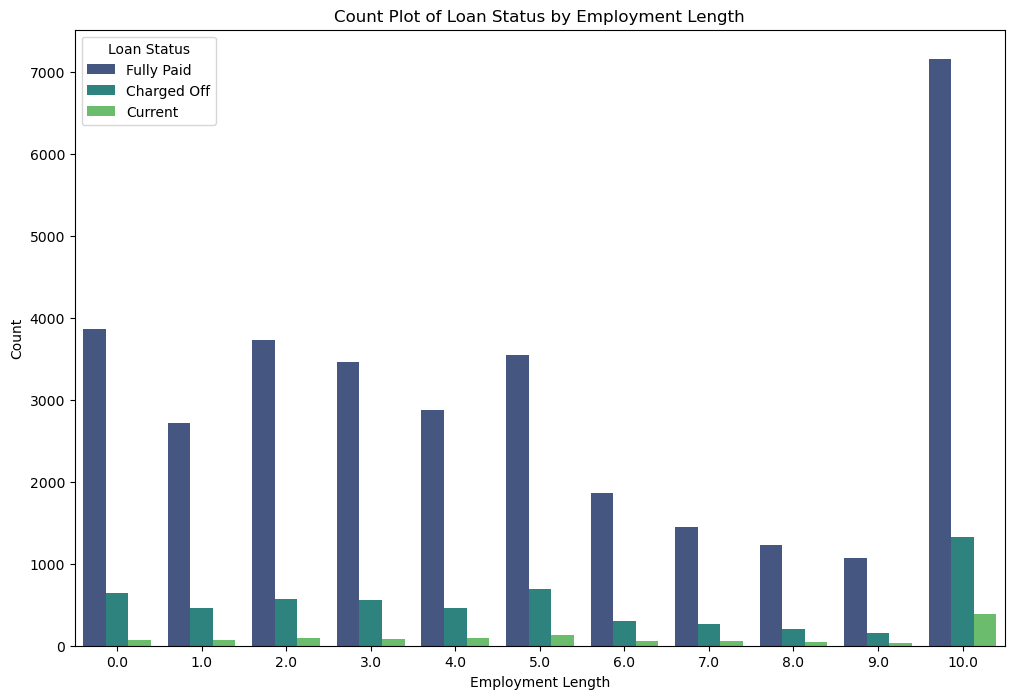

In [23]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(x='emp_length', hue='loan_status', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Count Plot of Loan Status by Employment Length')

# Show the legend
plt.legend(title='Loan Status')

# Show the plot
plt.show()